In [1]:
# Importing pandas and matplotlib
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plot user defined function
def get_plot(function):
    if function == 'b':
        boxplot_generator(measurements_df, outliers=False);
        boxplot_generator(measurements_df);
    elif function == 'l':
        ol = input('Include outliers [y/n]: ')
        if ol == 'n':
            lineplot_generator(measurements_df, outliers=False);
        elif ol == 'y':
            lineplot_generator(measurements_df);
        else:
            print('ERROR:incorrect input \'{}\' - please re-run script.'.format(ol))
    else:
        print('ERROR:incorrect input \'{}\' - please re-run script.'.format(function))
        
    return None

In [3]:
# add dataframe column 'day' to represent the number of days since start of treatment
# return final day of treatment for filesaving
def add_days_column(dframe):
    start_date = datetime.strptime(dframe.loc[0,'date'], "%m/%d/%y") # datetime object for start of treatment
    final_date = datetime.strptime(dframe.iloc[-1,0], "%m/%d/%y").strftime('%d%b%Y') # datetime object for start of treatment
    for i in measurements_df.index:
        timedelta = int((datetime.strptime(dframe.loc[i,'date'], "%m/%d/%y") - start_date).days)
        dframe.loc[i, 'day'] = timedelta

    return final_date

In [4]:
# define a function that generates boxplot to compare `Test` vs `Control` group
def boxplot_generator(dframe, outliers=True): # input dframe(DataFrame), outlier(boolean)
    
    if outliers == False:
        x = int(input('Enter maximum value (area_mm^2): '))
        dframe = dframe[dframe['area_mm^2'] <= x]
    
    ax = sns.catplot(data=dframe, kind='box', x='day', y='area_mm^2', hue='type', native_scale=True)
       
    if outliers == True:
        ax.set_axis_labels('Days from Start of Treatment', 'Area (mm^2)')
        ax.fig.suptitle('Test vs Control with Outliers')
        plt.savefig('{} figure with outliers.png'.format(last_day), dpi=300)
    else:
        ax.set_axis_labels('Days from Start of Treatment', 'Area (mm^2)')
        ax.fig.suptitle('Test vs Control w/o Outliers > {}'.format(x))
        plt.savefig('{} without outliers > {}'.format(last_day, x), dpi=300)
    
    return None

In [5]:
# define a function that generates boxplot to compare `Test` vs `Control` group
def lineplot_generator(dframe, outliers=True): # input dframe(DataFrame), outlier(boolean)
    
    if outliers == False:
        x = int(input('Enter maximum value (area_mm^2): '))
        dframe = dframe[dframe['area_mm^2'] <= x]
    
    ax = sns.lineplot(data=dframe, x='day', y='area_mm^2', hue='type')
    
    if outliers == True:
        plt.xlabel('Days from Start of Treatment')
        plt.ylabel('Area (mm^2)')
        plt.title('Test vs Control with Outliers')
        plt.savefig('{} lineplot with outliers.png'.format(last_day), dpi=300)
    else:
        plt.xlabel('Days from Start of Treatment')
        plt.ylabel('Area (mm^2)')
        plt.title('Test vs Control w/o Outliers > {}'.format(x))
        plt.savefig('{} lineplot without outliers > {}'.format(last_day, x), dpi=300)
    
    return None

In [6]:
# Read in data collection CSV as a DataFrame and mutate
unfiltered_measurements_df = pd.read_csv(input('Enter filepath for .csv file: '))
measurements_df = unfiltered_measurements_df[pd.isna(unfiltered_measurements_df['date']) == False] # remove last NaN row
last_day = add_days_column(measurements_df);

Enter filepath for .csv file:  measurements.csv


Enter key-sensitive plot generation (boxplot or lineplot) [b/l]:  l
Include outliers [y/n]:  y


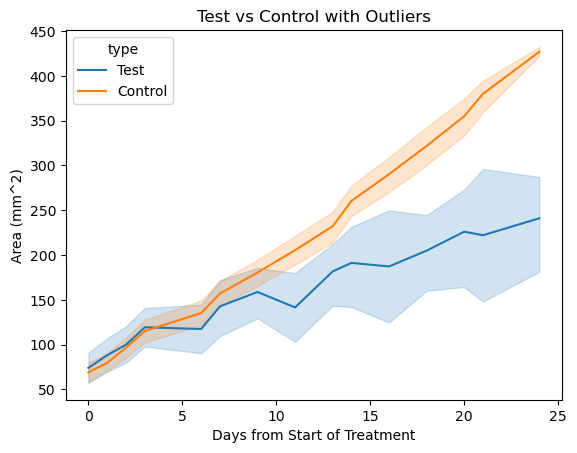

In [7]:
# get user defined function call and test plot script
get_plot(input('Enter key-sensitive plot generation (boxplot or lineplot) [b/l]: '));